In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [3]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

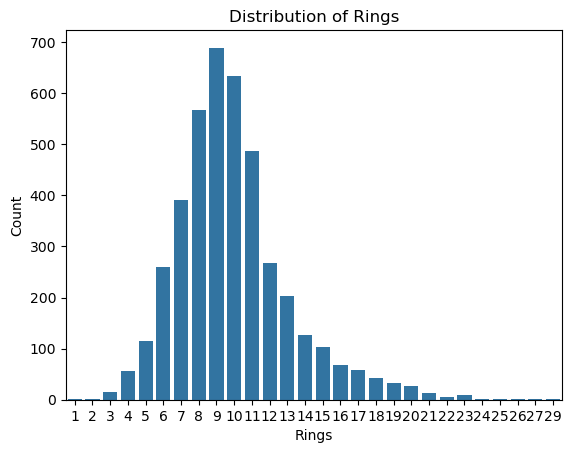

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'Rings' 컬럼의 분포 시각화
sns.countplot(data=df, x='Rings')
plt.xlabel('Rings')
plt.ylabel('Count')
plt.title('Distribution of Rings')
plt.show()

In [5]:
# 레이블 갯수 확인 (숫자)
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [6]:
# 결측치 확인
(df == 0).sum()

Sex               0
Length            0
Diameter          0
Height            2
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [7]:
# 결측치 제거
df = df[(df != 0).all(axis=1)]
df['Rings'].value_counts()

Rings
9     689
10    634
8     567
11    487
7     391
12    267
6     258
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

/var/folders/yj/_g4w66fx1ps2gpwqh06f_7jm0000gn/T/ipykernel_40132/3101609980.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Length'], kde = True, hist = False, ax=ax1)
/var/folders/yj/_g4w66fx1ps2gpwqh06f_7jm0000gn/T/ipykernel_40132/3101609980.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

<Axes: xlabel='Diameter', ylabel='Density'>

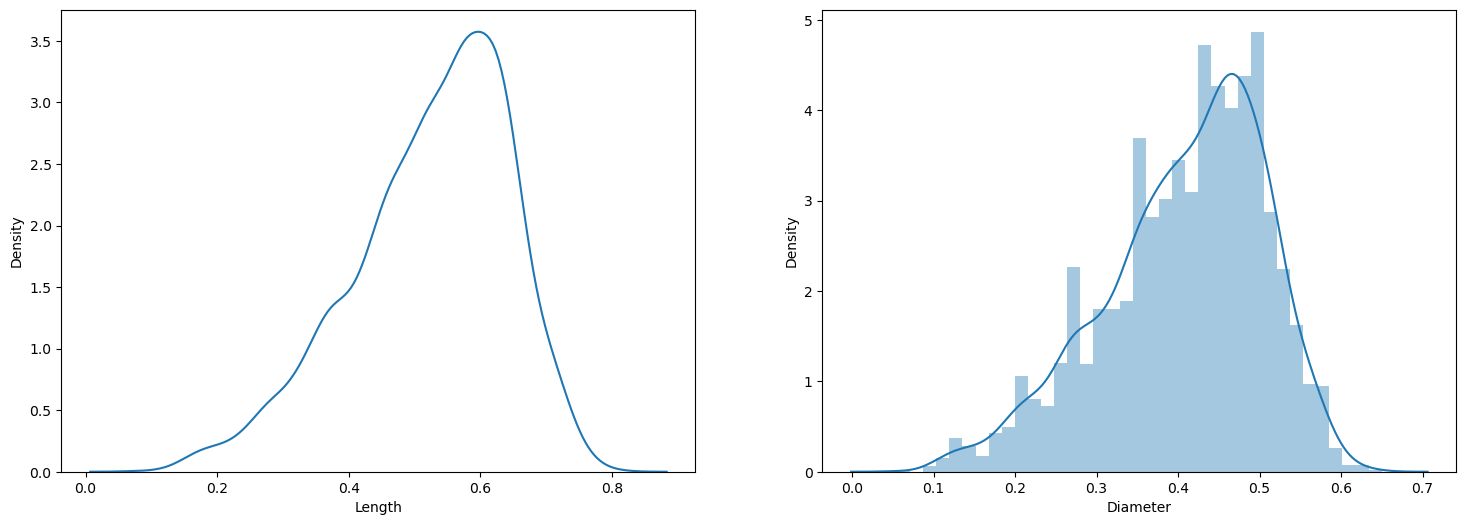

In [8]:
# 컬럼별 히스토그램 확인

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['Length'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['Diameter'], ax=ax2)

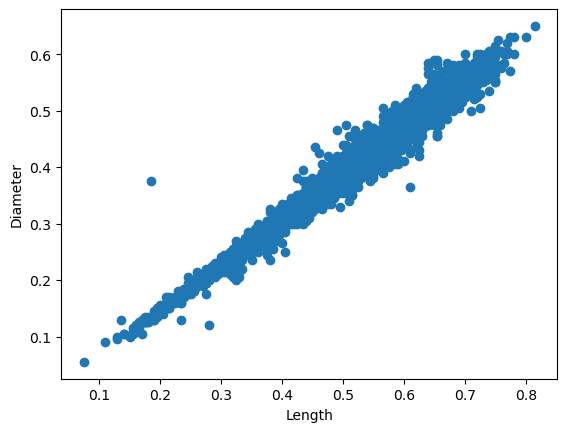

In [9]:
# 산점도 확인

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['Length'], df['Diameter'])
plt.xlabel('Length')
plt.ylabel('Diameter')

plt.show()

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Sex'] = df['Sex'].astype('category')


/var/folders/yj/_g4w66fx1ps2gpwqh06f_7jm0000gn/T/ipykernel_40132/1087220631.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].astype('category')


In [13]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [104]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Sex']

id
0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: Sex, Length: 4175, dtype: int64

In [105]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [17]:
one_hot_encoded_data

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,True,False,False
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,False,False,True
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,False,False,True


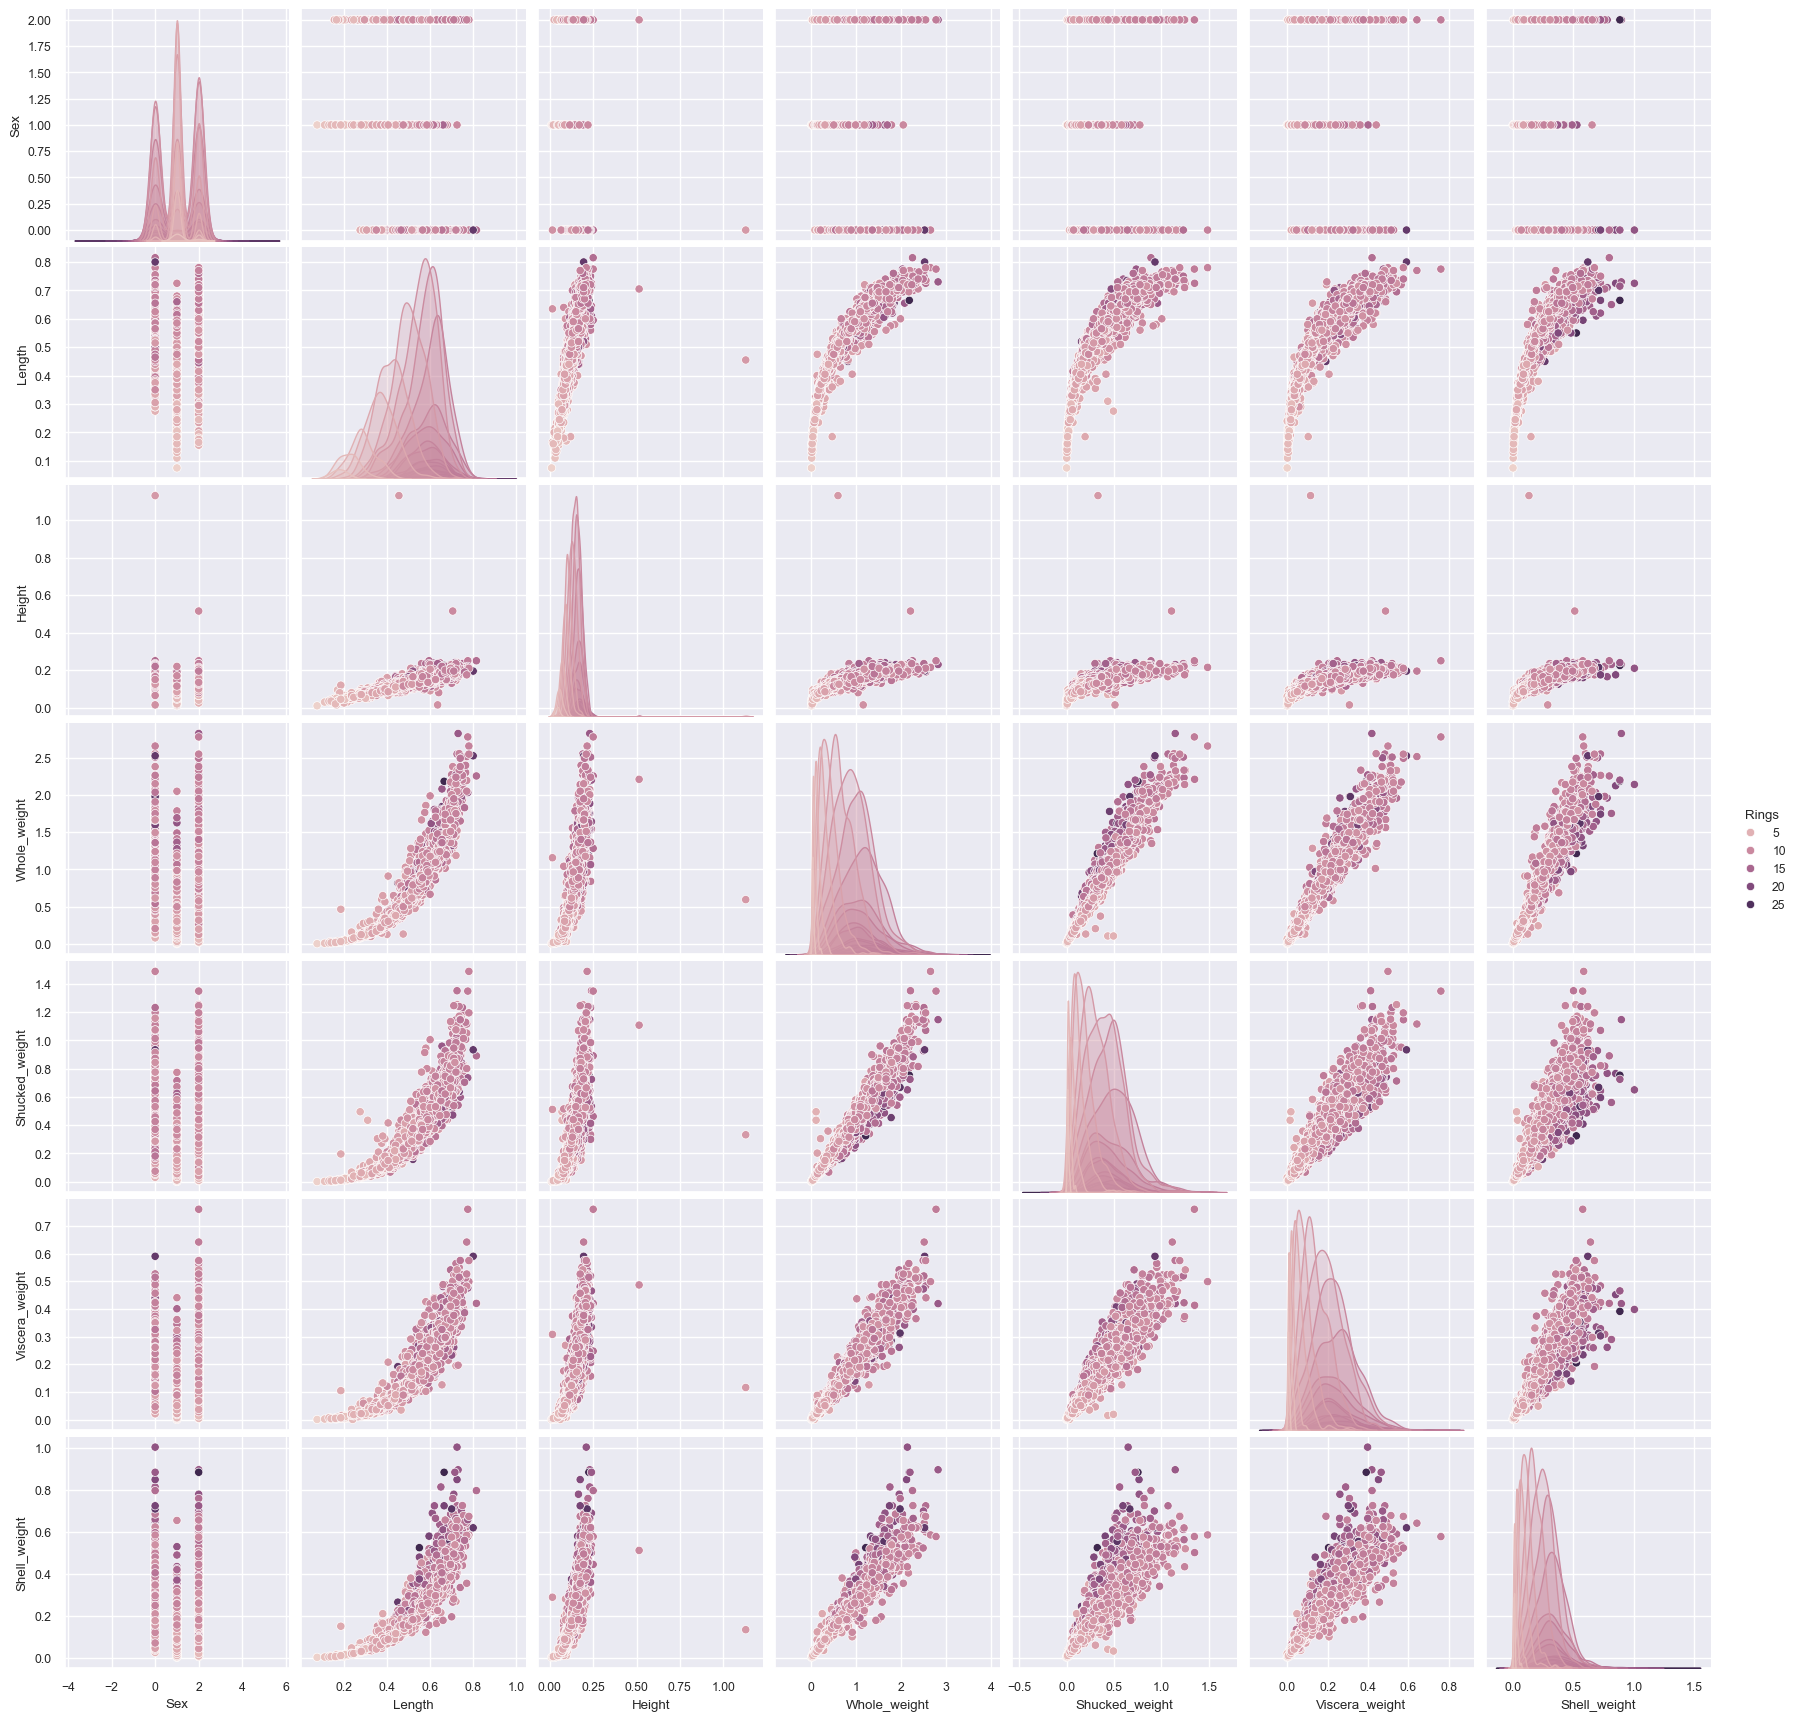

In [107]:
# pairplot를 사용해 각 상관관계 살펴보기

sns.pairplot(df,
             vars=['Sex', 'Length', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight'],
             hue='Rings')
plt.show()

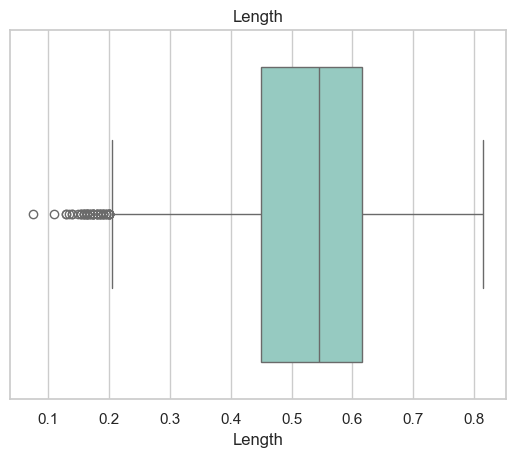

In [108]:
# 특정 칼럼의 범위 확인 및 outlier 확인

sns.set_theme(style="whitegrid")
sns.boxplot(x="Length", data=df, palette="Set3")
plt.title("Length")
plt.show()

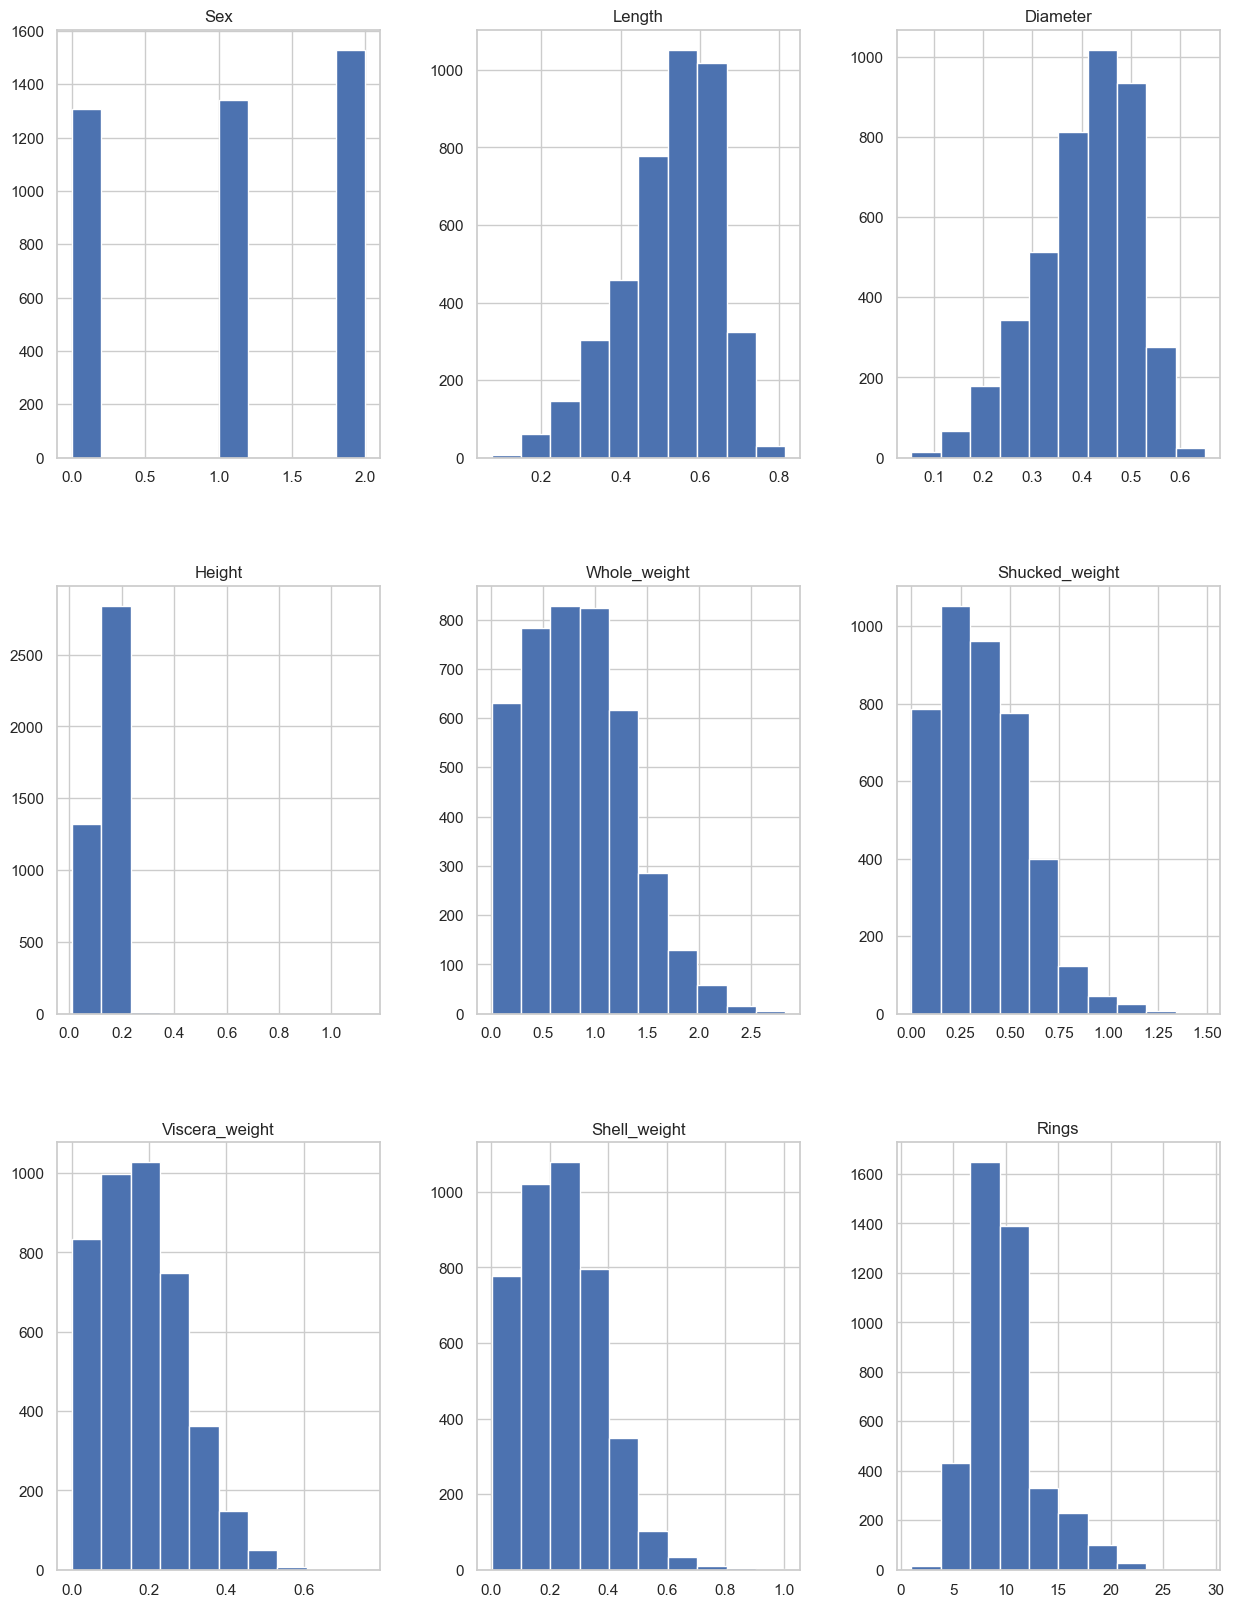

In [109]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [110]:
X=df.drop('Rings',axis=1)
X.head()


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [111]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [112]:
y=df['Rings']
y.value_counts()

Rings
9     689
10    634
8     567
11    487
7     391
12    267
6     258
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [115]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))



--- SVM Classifier ---
0.2547892720306513
[[ 0  3  0  1  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  0 23  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0 25 16  3  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24 29 20 28  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  8 15 50 64  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  8 27 88 38  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3 12 92 49 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1 10 53 36 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2 40 15 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  6 20 13 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2 16  7  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3 12  7  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  

In [116]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.2595785440613027
[[ 0  0  2  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 28  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 15 28  7  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 15 42 33 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  7 20 51 60  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2 12 27 81 38  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 13 16 66 58 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  5 15 44 37 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  3 10 24 15 21  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  3 19 13 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2 12 10  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1 12  8  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 

In [117]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.28065134099616856
[[ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  5  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  9 14  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2 25 17  5  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2 22 44 22 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  7 26 52 50  6  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  9 29 83 30 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2 11 16 69 40 30  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  9 52 27 33  1  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  5 23 19 19  0  2  0  1  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  5  8 17 15  0  2  1  1  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  6 12  4  0  2  1  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  8  6  5  0  6  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  

In [118]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.18773946360153257
[[ 0  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  2  2  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  6  4 12  4  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  6 16 12 12  2  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  7 21 30 18 14  7  0  0  2  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  1  1  9 19 45 32 24  9  3  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4 16 33 32 37 22  7  8  2  1  0  2  1  0  1  0  0  0  0  0]
 [ 0  0  0  5 13 14 37 29 31 13 11  7  3  1  1  0  1  3  0  0  0  0  0]
 [ 0  0  0  1  6  7 26 28 22 11  8  5  4  6  0  1  0  1  0  0  0  0  0]
 [ 0  0  0  1  3  6 10 15 11  7  9  1  1  4  3  0  2  0  0  2  0  0  0]
 [ 0  0  0  0  1  8  3  7  8  4  4  6  2  2  1  2  2  2  0  0  0  0  0]
 [ 0  0  0  0  0  2  3  7  2  1  4  1  1  2  1  0  1  1  1  0  1  0  0]
 [ 0  0  0  0  0  3  5  1  3  4  4  2  0  1  1  1  1  0  0  0  0  0  0]
 [ 0  0  0

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.23946360153256704
[[ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  5  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7 10 13  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  5 18 20  6  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4 28 32 27  8  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  8 27 49 39 12  4  1  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 13 38 49 35 25  4  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  7  5 19 57 43 26  7  3  1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  3 13 30 36 31  5  3  0  1  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  3  6 17 17 16  5  4  3  2  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  2  5  8 14 12  1  6  2  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  3  7  9  2  2  1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  5  4  5  4  1  1  1  1  1  0  0  0  0

In [120]:
y.head()

id
0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [121]:
Y = pd.get_dummies(y).values

In [122]:
X = X.values

In [123]:
X

array([[2.    , 0.455 , 0.365 , ..., 0.2245, 0.101 , 0.15  ],
       [2.    , 0.35  , 0.265 , ..., 0.0995, 0.0485, 0.07  ],
       [0.    , 0.53  , 0.42  , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [2.    , 0.6   , 0.475 , ..., 0.5255, 0.2875, 0.308 ],
       [0.    , 0.625 , 0.485 , ..., 0.531 , 0.261 , 0.296 ],
       [2.    , 0.71  , 0.555 , ..., 0.9455, 0.3765, 0.495 ]])

In [124]:
y

id
0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4175, dtype: int64

In [125]:
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [126]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [127]:
X_test.shape

(835, 8)

In [128]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(8,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(28,activation='softmax'))

model.compile(Adam(learning_rate=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 28)             │           196 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 428 (1.67 KB)

 Trainable params: 428 (1.67 KB)

 Non-trainable params: 0 (0.00 B)

In [129]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1675 - loss: 2.5952 - val_accuracy: 0.1988 - val_loss: 2.1719
Epoch 2/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.2278 - loss: 2.1814 - val_accuracy: 0.2204 - val_loss: 2.0971
Epoch 3/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.2415 - loss: 2.0988 - val_accuracy: 0.2479 - val_loss: 2.2767
Epoch 4/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.2499 - loss: 2.1142 - val_accuracy: 0.2551 - val_loss: 2.0762
Epoch 5/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.2462 - loss: 2.0430 - val_accuracy: 0.2575 - val_loss: 1.9741
Epoch 6/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.2445 - loss: 2.0259 - val_accuracy: 0.2096 - val_loss: 2.1132
Epoch 7/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.2559 - loss: 2.0496 - val_accuracy: 0.2407 - val_loss: 2.0314
Epoch 8/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.2485 - loss: 2.0529 - va

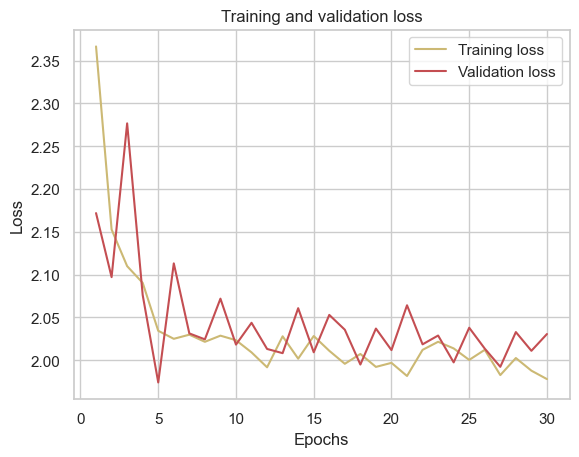

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

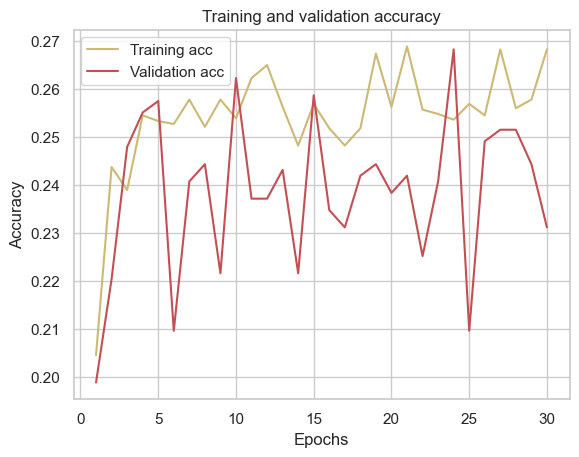

In [131]:

acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [132]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         9
           4       0.38      0.64      0.48        28
           5       0.23      0.53      0.32        43
           6       0.15      0.02      0.04        82
           7       0.25      0.59      0.35       110
           8       0.23      0.32      0.27       131
           9       0.24      0.18      0.21       144
          10       0.22      0.13      0.16       100
          11       0.00      0.00      0.00        58
          12       0.00      0.00      0.00        37
          13       0.00      0.00      0.00        20
          14       0.10      0.19      0.13        21
          15       0.00      0.00      0.00        15
          16       0.00      0.00      0.00        10
          17       0.00      0.00      0.00         4
          18       0.00      0.00      0.00         7
          19       0.00    

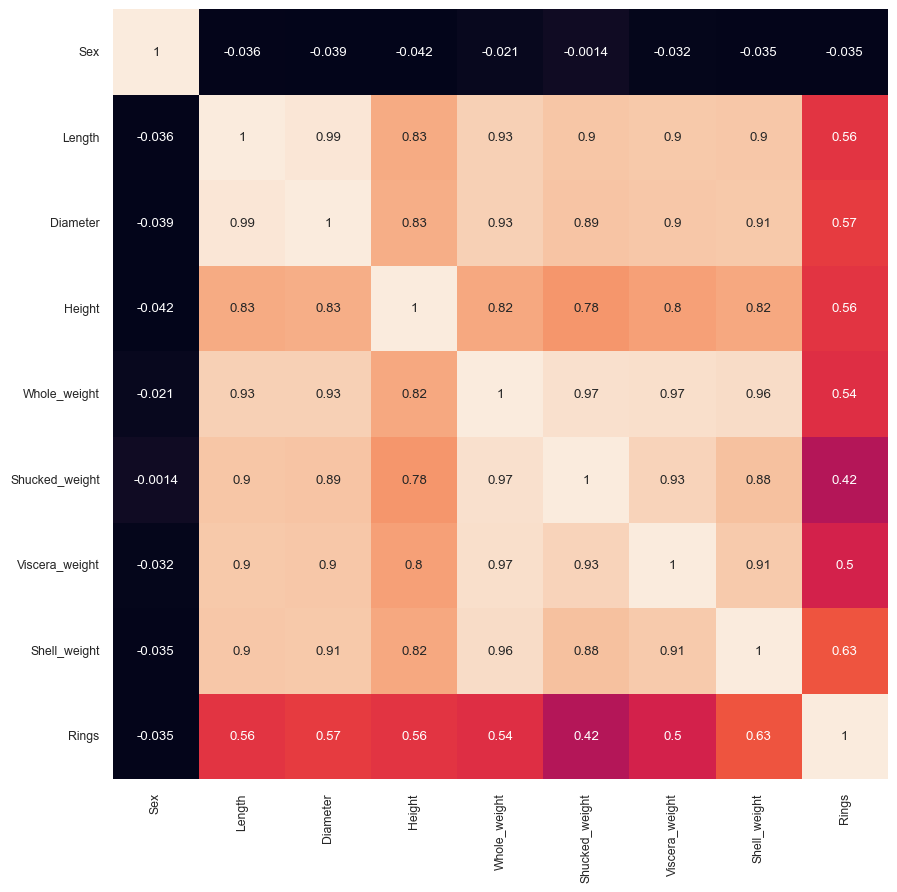

In [133]:
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [134]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [135]:
X = df.drop('Rings',axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [136]:
y = df['Rings']
y.head()

id
0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3340, 8) (3340,)
(835, 8) (835,)


In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 5.135745304823168
평균제곱근오차 5.135745304823168
평균제곱근오차 5.135745304823172


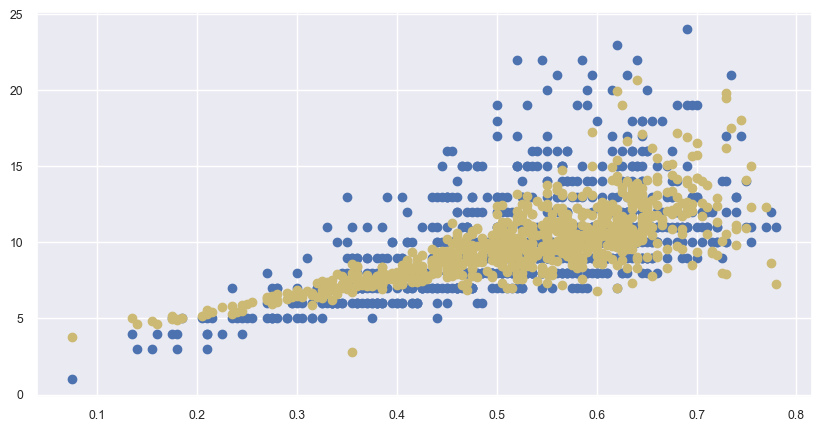

In [139]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['Length'], y_test, label='y_test')
plt.scatter(X_test['Length'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()

In [140]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 9.023952095808383


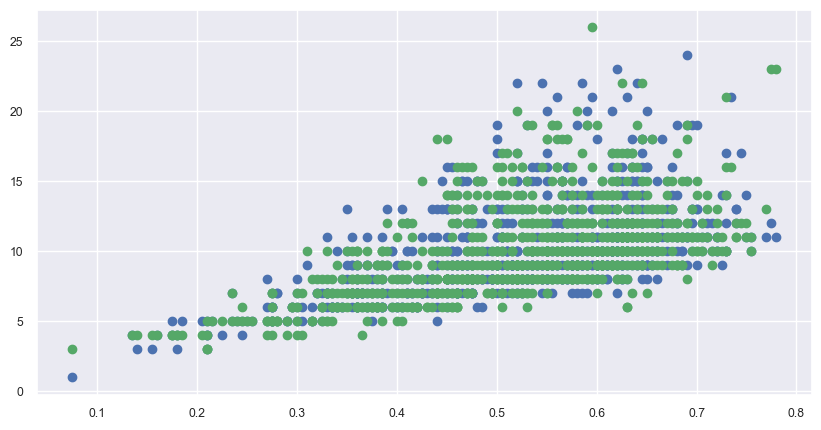

In [141]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Length'], y_test, label='y_test')
plt.scatter(X_test['Length'], dy_preds, c='g', label='dy_preds')
plt.show()  

In [142]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 4.9216403592814375


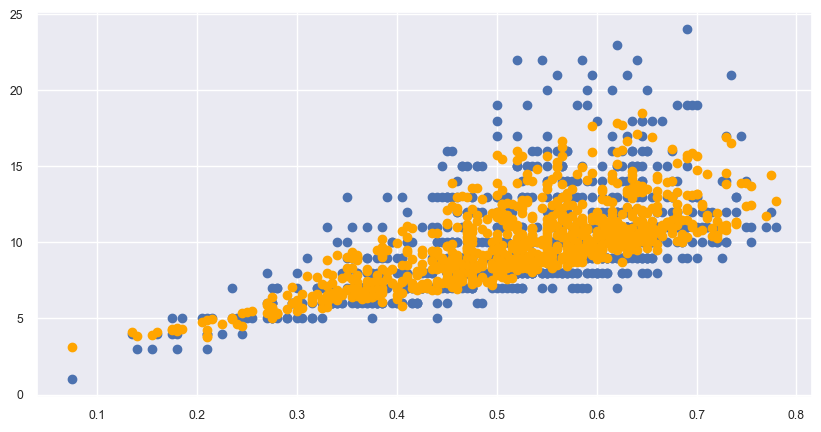

In [143]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Length'], y_test, label='y_test')
plt.scatter(X_test['Length'], ry_preds, c='orange', label='ry_preds')

plt.show() 

In [144]:

from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 5.792391988886081


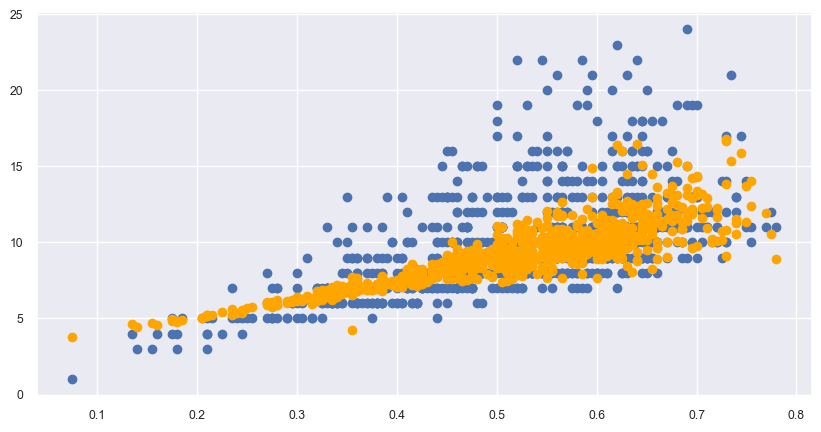

In [145]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Length'], y_test, label='y_test')
plt.scatter(X_test['Length'], ry_preds, c='orange', label='ry_preds')

plt.show()

In [146]:
Y = pd.get_dummies(y).values

In [147]:
X = X.values

In [148]:
X

array([[2.    , 0.455 , 0.365 , ..., 0.2245, 0.101 , 0.15  ],
       [2.    , 0.35  , 0.265 , ..., 0.0995, 0.0485, 0.07  ],
       [0.    , 0.53  , 0.42  , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [2.    , 0.6   , 0.475 , ..., 0.5255, 0.2875, 0.308 ],
       [0.    , 0.625 , 0.485 , ..., 0.531 , 0.261 , 0.296 ],
       [2.    , 0.71  , 0.555 , ..., 0.9455, 0.3765, 0.495 ]])

In [149]:
y

id
0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4175, dtype: int64

In [150]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [86]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((3340, 10), (3340, 28), (835, 10), (835, 28))

In [98]:
X_train

array([[0.63, 0.48, 0.16, ..., True, False, False],
       [0.415, 0.305, 0.105, ..., True, False, False],
       [0.415, 0.305, 0.13, ..., True, False, False],
       ...,
       [0.595, 0.46, 0.15, ..., False, True, False],
       [0.625, 0.49, 0.175, ..., True, False, False],
       [0.415, 0.335, 0.1, ..., False, True, False]], dtype=object)

In [100]:

#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(10,),activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,319 (5.15 KB)

 Trainable params: 1,319 (5.15 KB)

 Non-trainable params: 0 (0.00 B)

In [101]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [99]:
data = one_hot_encoded_data.astype(int)

In [102]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [103]:
one_hot_encoded_data

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,True,False,False
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,False,False,True
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,False,False,True
